In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.shape

(891, 12)

In [7]:
df_test.shape

(418, 11)

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df = pd.concat([df_train, df_test], axis = 0, sort = False).reset_index(drop = True)
df.shape

(1309, 12)

In [10]:
copy_df = df.copy()

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [14]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
df_type = df.dtypes.reset_index()

In [16]:
df_type.columns = ['Feature', 'Type']

In [17]:
df_type

,Feature,Type
0,PassengerId,int64
1,Survived,float64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [18]:
col_numeric = list(df_type[(df_type['Type'] != object) & (df_type['Feature'] != 'PassengerId') ]['Feature'])

In [19]:
col_categoric = list(df_type[df_type['Type'] == object]['Feature'])

Handling Missing Values

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [21]:
total_missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total_missing_values, percentage], keys = ['total', 'percentage of total'], axis = 1)

In [22]:
missing_values

,total,percentage of total
Cabin,1014,77.463713
Survived,418,31.932773
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000


Percentage of missing values on cabin is more than 60% so i decide to delete the column. In addition, cabin haven't a bigger effect to determine whether the passenger survived or not

In [23]:
df.drop(columns = 'Cabin', inplace = True)

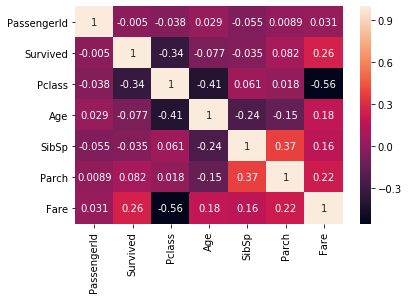

In [24]:
sns.heatmap(df.corr(), annot = True)

In [25]:
df.groupby(['Parch'])['Age'].mean()

Parch
0    31.969401
1    24.965625
2    18.975979
3    38.875000
4    47.600000
5    39.333333
6    41.500000
9          NaN
Name: Age, dtype: float64

In [26]:
df.groupby(['SibSp'])['Age'].mean()

SibSp
0    30.921766
1    31.058071
2    23.569444
3    16.312500
4     8.772727
5    10.166667
8    14.500000
Name: Age, dtype: float64

In [27]:
df.groupby(['Survived'])['Age'].mean()

Survived
0.0    30.626179
1.0    28.343690
Name: Age, dtype: float64

In [28]:
df['Age'].mean()

29.881137667304014

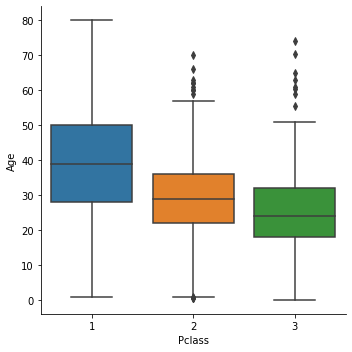

In [29]:
sns.catplot(x = 'Pclass', y = 'Age', kind = 'box' , data = df)

In [30]:
df.groupby(['Pclass'])['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [31]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [32]:
def age_impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [33]:
for i in range(len(df)):
    df['Age'] = df['Age'].fillna(age_impute([df['Age'][i], df['Pclass'][i]]))

In [34]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [35]:
df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [36]:
df[df['Fare'].isnull() == True]['Pclass']

1043    3
Name: Pclass, dtype: int64

In [37]:
df['Fare'] = df['Fare'].fillna(13.302889)

In [38]:
df['Embarked'].mode()

0    S
dtype: object

In [39]:
df['Embarked'] = df['Embarked'].fillna('S')

In [40]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

EDA

In [41]:
train_df = df.iloc[ :891 , :]
test_df = df.iloc[891: , :]

In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,28.297685,0.498854,0.385027,33.280206
std,378.020061,0.486592,0.837836,13.264855,1.041658,0.865560,51.741830
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [43]:
col_numeric

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

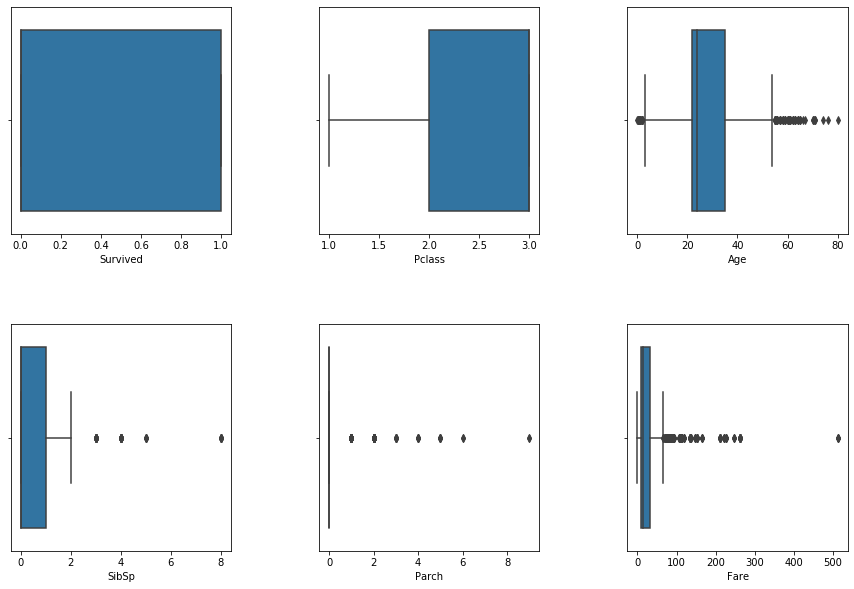

In [44]:
fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2,3,i)
    sns.boxplot(df[col_numeric[i-1]])
    plt.xlabel(col_numeric[i-1])

In [45]:
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)

IQR = Q3 - Q1

In [46]:
#maximum = Q3 + (1.5*IQR)
#print('Maximum value of each variable ')
#print(maximum)
#minimum = Q1 - (1.5*IQR)
#print('Minimum value of each variable ')
#print(minimum)

#more_than = (df > maximum)
#lower_than = (df < minimum)
#df = df.mask(more_than, maximum, axis = 1)
#df = df.mask(lower_than, minimum, axis = 1)

#print('\nPersebaran data setelah ditangani Outlier: ')
#print(df[['Age', 'Fare']].describe())

box plot detect outlier in each column

In [47]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [48]:
sns.set(style = 'whitegrid')

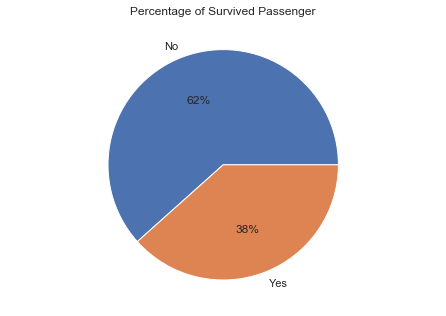

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = 'No', 'Yes'
survived = df['Survived'].value_counts()
ax.pie(survived, labels= labels, autopct='%.0f%%')
plt.title('Percentage of Survived Passenger')
plt.show()

In [50]:
col_numeric[1:][0]

'Pclass'

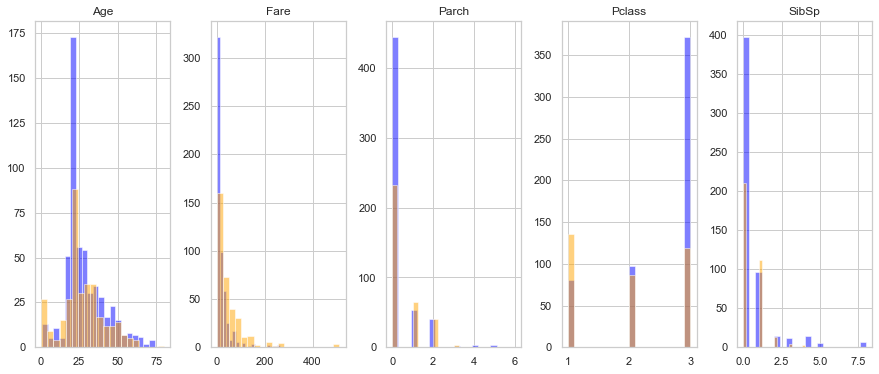

In [51]:
fig, ax = plt.subplots(1,5, figsize = (15,6))
df[df['Survived'] == 0][col_numeric[1:]].hist(bins = 20,color = 'blue', alpha = 0.5, ax = ax)
df[df['Survived'] == 1][col_numeric[1:]].hist(bins = 20, color = 'orange', alpha = 0.5, ax = ax )
plt.show()

In [52]:
col_categoric

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [53]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

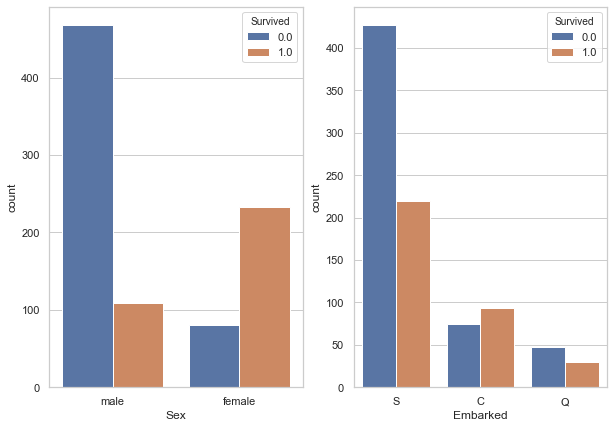

In [54]:
fig = plt.figure(figsize =  (10,7))
fig.subplots_adjust()
fig.add_subplot(1,2,1)
sns.countplot(df['Sex'], hue = df['Survived'])
fig.add_subplot(1,2,2)
sns.countplot(df['Embarked'], hue = df['Survived'])

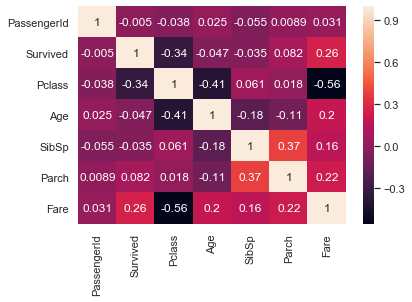

In [55]:
sns.heatmap(df.corr(), annot = True)

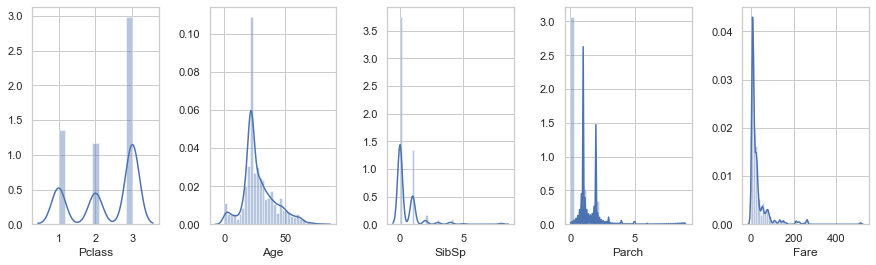

In [56]:
fig = plt.figure(figsize = (15,4))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, len(col_numeric)):
    ax = fig.add_subplot(1,5,i)
    sns.distplot(df[col_numeric[i]])
    plt.xlabel(col_numeric[i])

Encode Categorical Values

In [57]:
col_categoric

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
df['Sex_Encode'] = LabelEncoder().fit_transform(df['Sex'])

In [60]:
df['Embarked_Encode'] = LabelEncoder().fit_transform(df['Embarked'])

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Encode,Embarked_Encode
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2


In [62]:
final = df[['Pclass', 'Age', 'Sex_Encode', 'Embarked_Encode','SibSp', 'Parch', 'Fare', 'Survived']]

In [63]:
final.head()

,Pclass,Age,Sex_Encode,Embarked_Encode,SibSp,Parch,Fare,Survived
0,3,22.0,1,2,1,0,7.2500,0.0
1,1,38.0,0,0,1,0,71.2833,1.0
2,3,26.0,0,2,0,0,7.9250,1.0
3,1,35.0,0,2,1,0,53.1000,1.0
4,3,35.0,1,2,0,0,8.0500,0.0


ML

In [64]:
train = final.iloc[ :891, : ]
test = final.iloc[ 891: , :-1]

In [65]:
X = train.iloc[ :891, :-1 ]
Y = train.iloc[ :891, -1 ]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn_training = round(knn.score(X_train,y_train) * 100, 2)
acc_knn_training

83.43

In [68]:
y_train_pred = knn.predict(X_train)
print('Classification Report Training Model (KNN):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (KNN):

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       444
         1.0       0.80      0.74      0.77       268

    accuracy                           0.83       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712



In [69]:
y_test_pred = knn.predict(X_test)
print('Classification Report Testing Model (KNN):\n')
print(classification_report(y_test,y_test_pred))
acc_knn_test = round(knn.score(X_test,y_test) * 100, 2)
acc_knn_test

Classification Report Testing Model (KNN):

              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       105
         1.0       0.70      0.47      0.56        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.67       179
weighted avg       0.70      0.70      0.68       179



69.83

In [70]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian_training = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_training

79.78

In [71]:
y_train_pred = gaussian.predict(X_train)
print('Classification Report Training Model (Gaussian Naive Bayes):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Gaussian Naive Bayes):

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       444
         1.0       0.74      0.72      0.73       268

    accuracy                           0.80       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [72]:
y_test_pred = gaussian.predict(X_test)
print('Classification Report Testing Model (Gaussian Naive Bayes):\n')
print(classification_report(y_test,y_test_pred))
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian_test

Classification Report Testing Model (Gaussian Naive Bayes):

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       105
         1.0       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



77.65

In [73]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree_training = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_training

97.89

In [74]:
y_train_pred = decision_tree.predict(X_train)
print('Classification Report Training Model (Decision Tree):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Decision Tree):

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       444
         1.0       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712



In [75]:
y_test_pred = decision_tree.predict(X_test)
print('Classification Report Training Model (Decision Tree):\n')
print(classification_report(y_test,y_test_pred))
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree_test

Classification Report Training Model (Decision Tree):

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       105
         1.0       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



76.54

In [76]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest_training = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_training

96.21

In [77]:
y_train_pred = random_forest.predict(X_train)
print('Classification Report Training Model (Random Forest):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest):

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       444
         1.0       0.97      0.93      0.95       268

    accuracy                           0.96       712
   macro avg       0.96      0.96      0.96       712
weighted avg       0.96      0.96      0.96       712



In [78]:
y_test_pred = random_forest.predict(X_test)
print('Classification Report Training Model (Random Forest):\n')
print(classification_report(y_test,y_test_pred))
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest_test

Classification Report Training Model (Random Forest):

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



82.12

In [79]:
#LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg_training = round(logreg.score(X_train, y_train) * 100, 2)
acc_logreg_training

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.48

In [80]:
y_train_pred = logreg.predict(X_train)
print('Classification Report Training Model (Log Reg):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Log Reg):

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       444
         1.0       0.77      0.68      0.72       268

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [81]:
y_test_pred = logreg.predict(X_test)
print('Classification Report Training Model (Log Reg):\n')
print(classification_report(y_test,y_test_pred))
acc_logreg_test = round(logreg.score(X_test, y_test) * 100, 2)
acc_logreg_test

Classification Report Training Model (Log Reg):

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       105
         1.0       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



78.21

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_model = GradientBoostingClassifier().fit(X_train, y_train)
print(gbt_model)
acc_gbt_training = round(gbt_model.score(X_train, y_train) * 100, 2)
acc_gbt_training

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


90.45

In [83]:
y_train_pred = gbt_model.predict(X_train)
print('Classification Report Training Model (GBT):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (GBT):

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       444
         1.0       0.94      0.79      0.86       268

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.91      0.90      0.90       712



In [84]:
y_test_pred = gbt_model.predict(X_test)
print('Classification Report Training Model (GBT):\n')
print(classification_report(y_test,y_test_pred))
acc_gbt_test = round(gbt_model.score(X_test, y_test) * 100, 2)
acc_gbt_test

Classification Report Training Model (GBT):

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       105
         1.0       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



81.56

In [85]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes',
              'Decision Tree', 'Gradient Boost' ],
    'Training Score': [ acc_knn_training, acc_logreg_training, 
              acc_random_forest_training, acc_gaussian_training,
              acc_decision_tree_training, acc_gbt_training],
    'Test Score': [ acc_knn_test, acc_logreg_test, 
              acc_random_forest_test, acc_gaussian_test,
              acc_decision_tree_test, acc_gbt_test] })
models

,Model,Training Score,Test Score
0,KNN,83.43,69.83
1,Logistic Regression,80.48,78.21
2,Random Forest,96.21,82.12
3,Naive Bayes,79.78,77.65
4,Decision Tree,97.89,76.54
5,Gradient Boost,90.45,81.56


Modeling with Principal Component Analysis (PCA)

In [86]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA(n_components = 3)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)

This is the variance explained by the principle components
[9.38013016e-01 6.09334351e-02 4.95935464e-04]


In [110]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_pca, y_train)
y_pred = knn.predict(x_test_pca)
acc_knn_training = round(knn.score(x_train_pca,y_train) * 100, 2)
acc_knn_training

81.88

In [111]:
y_train_pred = knn.predict(x_train_pca)
print('Classification Report Training Model (KNN):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (KNN):

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       444
         1.0       0.78      0.72      0.75       268

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712



In [112]:
y_test_pred = knn.predict(x_test_pca)
print('Classification Report Testing Model (KNN):\n')
print(classification_report(y_test,y_test_pred))
acc_knn_test = round(knn.score(x_test_pca,y_test) * 100, 2)
acc_knn_test

Classification Report Testing Model (KNN):

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.78       105
         1.0       0.71      0.50      0.59        74

    accuracy                           0.71       179
   macro avg       0.71      0.68      0.68       179
weighted avg       0.71      0.71      0.70       179



70.95

In [113]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train_pca, y_train)
y_pred = gaussian.predict(x_test_pca)
acc_gaussian_training = round(gaussian.score(x_train_pca, y_train) * 100, 2)
acc_gaussian_training

67.98

In [114]:
y_train_pred = gaussian.predict(x_train_pca)
print('Classification Report Training Model (Gaussian Naive Bayes):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Gaussian Naive Bayes):

              precision    recall  f1-score   support

         0.0       0.67      0.95      0.79       444
         1.0       0.75      0.22      0.34       268

    accuracy                           0.68       712
   macro avg       0.71      0.59      0.57       712
weighted avg       0.70      0.68      0.62       712



In [115]:
y_test_pred = gaussian.predict(x_test_pca)
print('Classification Report Testing Model (Gaussian Naive Bayes):\n')
print(classification_report(y_test,y_test_pred))
acc_gaussian_test = round(gaussian.score(x_test_pca, y_test) * 100, 2)
acc_gaussian_test

Classification Report Testing Model (Gaussian Naive Bayes):

              precision    recall  f1-score   support

         0.0       0.63      0.94      0.76       105
         1.0       0.74      0.23      0.35        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.55       179
weighted avg       0.68      0.65      0.59       179



64.8

In [116]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_pca, y_train)
y_pred = decision_tree.predict(x_test_pca)
acc_decision_tree_training = round(decision_tree.score(x_train_pca, y_train) * 100, 2)
acc_decision_tree_training

97.89

In [120]:
y_train_pred = decision_tree.predict(x_train_pca)
print('Classification Report Training Model (Random Forest):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest):

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       444
         1.0       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712



In [121]:
y_test_pred = decision_tree.predict(x_test_pca)
print('Classification Report Training Model (Decision Tree):\n')
print(classification_report(y_test,y_test_pred))
acc_decision_tree_test = round(decision_tree.score(x_test_pca, y_test) * 100, 2)
acc_decision_tree_test

Classification Report Training Model (Decision Tree):

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       105
         1.0       0.59      0.51      0.55        74

    accuracy                           0.65       179
   macro avg       0.64      0.63      0.63       179
weighted avg       0.65      0.65      0.65       179



65.36

In [122]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(x_train_pca, y_train)
y_pred = random_forest.predict(x_test_pca)
random_forest.score(x_train_pca, y_train)
acc_random_forest_training = round(random_forest.score(x_train_pca, y_train) * 100, 2)
acc_random_forest_training

96.21

In [123]:
y_train_pred = random_forest.predict(x_train_pca)
print('Classification Report Training Model (Random Forest):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest):

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       444
         1.0       0.97      0.93      0.95       268

    accuracy                           0.96       712
   macro avg       0.96      0.96      0.96       712
weighted avg       0.96      0.96      0.96       712



In [124]:
y_test_pred = random_forest.predict(x_test_pca)
print('Classification Report Training Model (Random Forest):\n')
print(classification_report(y_test,y_test_pred))
acc_random_forest_test = round(random_forest.score(x_test_pca, y_test) * 100, 2)
acc_random_forest_test

Classification Report Training Model (Random Forest):

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       105
         1.0       0.69      0.61      0.65        74

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.73      0.72       179



72.63

In [125]:
#LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_pca, y_train)
y_pred = logreg.predict(x_test_pca)
acc_logreg_training = round(logreg.score(x_train_pca, y_train) * 100, 2)
acc_logreg_training

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


67.84

In [126]:
y_test_pred = logreg.predict(x_test_pca)
print('Classification Report Training Model (Log Reg):\n')
print(classification_report(y_test,y_test_pred))
acc_logreg_test = round(logreg.score(x_test_pca, y_test) * 100, 2)
acc_logreg_test

Classification Report Training Model (Log Reg):

              precision    recall  f1-score   support

         0.0       0.64      0.95      0.76       105
         1.0       0.77      0.23      0.35        74

    accuracy                           0.65       179
   macro avg       0.70      0.59      0.56       179
weighted avg       0.69      0.65      0.59       179



65.36

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_model = GradientBoostingClassifier().fit(x_train_pca, y_train)
print(gbt_model)
acc_gbt_training = round(gbt_model.score(x_train_pca, y_train) * 100, 2)
acc_gbt_training

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


86.52

In [128]:
y_test_pred = gbt_model.predict(x_test_pca)
print('Classification Report Training Model (GBT):\n')
print(classification_report(y_test,y_test_pred))
acc_gbt_test = round(gbt_model.score(x_test_pca, y_test) * 100, 2)
acc_gbt_test

Classification Report Training Model (GBT):

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.78       105
         1.0       0.72      0.53      0.61        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.70       179
weighted avg       0.72      0.72      0.71       179



72.07

In [129]:
models_pca = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes',
              'Decision Tree', 'Gradient Boost' ],
    'Training Score': [ acc_knn_training, acc_logreg_training, 
              acc_random_forest_training, acc_gaussian_training,
              acc_decision_tree_training, acc_gbt_training],
    'Test Score': [ acc_knn_test, acc_logreg_test, 
              acc_random_forest_test, acc_gaussian_test,
              acc_decision_tree_test, acc_gbt_test] })
models_pca

,Model,Training Score,Test Score
0,KNN,81.88,70.95
1,Logistic Regression,67.84,65.36
2,Random Forest,96.21,72.63
3,Naive Bayes,67.98,64.80
4,Decision Tree,97.89,65.36
5,Gradient Boost,86.52,72.07
